In [3]:
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
X = (np.load("../BIO_Ml/GSE52588/GSE52588_beta_fn.npz"))["X"]
data = pd.read_csv("../BIO_Ml/GSE52588/GSE52588_samples.csv", delim_whitespace=True)

In [5]:
y = data["age"]
y = y.to_numpy()
X = Normalizer().fit_transform(X)

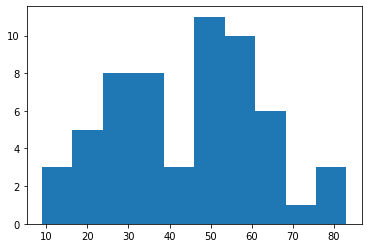

In [6]:
y = y[29:]
X = X[29:]
plt.hist(y)
plt.show()

In [7]:
test1 = SelectKBest(score_func=chi2, k = 10000)
fit = test1.fit(X, y)
X = fit.transform(X)

In [8]:
selector = RandomForestRegressor(n_estimators=60, criterion="squared_error", random_state= 42)
model = selector.fit(X, y)
importances = model.feature_importances_

important_features = []
for i in range(len(importances)):
    important_features.append(list(importances).index(importances[i])) if importances[i] > 0 else 0
X = X[..., important_features]

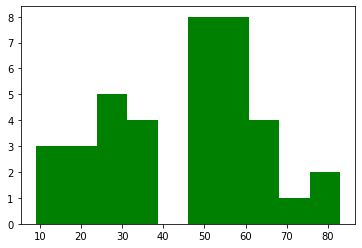

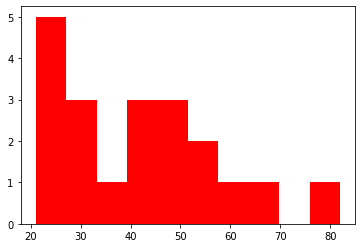

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.hist(y_train, color='g')
plt.show()
plt.hist(y_test, color= "r")
plt.show()

In [10]:
regressor = RandomForestRegressor(n_estimators=73, criterion="absolute_error", random_state= 42)
#regressor = LinearRegression()
#regressor = SVR(kernel="poly", C = 1.5)
model = regressor.fit(X_train, y_train)

In [11]:
y_pred = regressor.predict(X_test)
res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred,
                    "AE": y_test - y_pred,
                    "SE": (y_test - y_pred)**2})
print("MAE: ", mean_absolute_error(y_test, y_pred), "MSE: ", mean_squared_error(y_test, y_pred))
print(res)

MAE:  3.9256849315068507 MSE:  32.64602880465378
    Actual  Predicted         AE          SE
0       21  23.479452  -2.479452    6.147682
1       24  24.616438  -0.616438    0.379996
2       56  59.143836  -3.143836    9.883702
3       36  30.506849   5.493151   30.174704
4       46  48.890411  -2.890411    8.354476
5       61  60.732877   0.267123    0.071355
6       64  59.260274   4.739726   22.465003
7       33  29.363014   3.636986   13.227669
8       45  43.465753   1.534247    2.353913
9       32  30.027397   1.972603    3.891162
10      82  61.794521  20.205479  408.261400
11      21  23.493151  -2.493151    6.215800
12      51  54.520548  -3.520548   12.394258
13      42  48.904110  -6.904110   47.666729
14      33  27.972603   5.027397   25.274723
15      24  26.068493  -2.068493    4.278664
16      25  24.671233   0.328767    0.108088
17      42  44.438356  -2.438356    5.945581
18      56  53.561644   2.438356    5.945581
19      48  54.315068  -6.315068   39.880090


C:\Users\Eugen\AppData\Local\Temp/ipykernel_12232/3201256746.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_pred,"bo-", c= "r")
C:\Users\Eugen\AppData\Local\Temp/ipykernel_12232/3201256746.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_test,"bo-", c= "g")


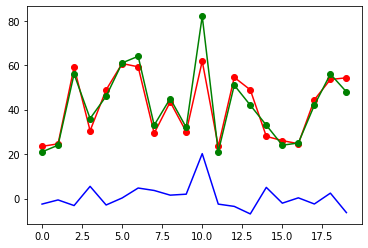

In [12]:
plt.plot(y_pred,"bo-", c= "r")
plt.plot(y_test,"bo-", c= "g")
plt.plot(y_test-y_pred, c= "b")
plt.show()